# Open Coding Hour Machine Learning Workshop
By Matthew Smith and Alexandra Lukasiewicz

Thanks for joining us on Kaggle! This website hosts a wide variety of datasets and examples of machine learning in different programming languages. We've found it very useful in creating this tutorial.

### During this workshop we will demonstrate two examples of machine learning using the Scikit-Learn python package
#### These are:
1. Supervised learning (in our example: generating a classifier)
1. Unsupervised learning- (clustering to observe patterns of similarity in the dataset)

### We will be working with two datasets from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/index.php)
* [Mushrooms](https://www.kaggle.com/uciml/mushroom-classification) (a dataset containing key mushroom identification features and their edibility) 
* [Wine](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) (A dataset containing features of different red wines such as acidity and sugar content and their quality score)

![](https://media.winefolly.com/Wine-pairing-portobello-mushroom-pinot-winefolly-1.jpg)
Image from "Wine and Grill Food Pairings Made For The Porch" by Phil Keelig, Wine Folly



# Introduction to machine learning 
### What are examples of questions you can ask using ML tools in scikit learn?
ML can be useful in answering biological questions where the exact steps or conditions that generate an outcome are unknown. 
An example can include: 
* Thermodynamic models with series of complex steps. 
* Metabolic engineering (Presnell and Alper 2020)
* Identifying patterns in systems (unsupervised clustering)
* Reducing heterogenous datasets (dimensionality reduction)

### What are challenges in machine learning?
**Poor dataset**
* Training dataset has too few entries 
* Dataset is not representative of new cases it will encounter 
* Irrelevant features

**Poor algorithm**
* Overfitting to training dataset
* Underfitting the training dataset (not enough factors included to be accurate when presented with new information)

### Applying machine learning in your own research
**Generating hypotheses**
* Unsupervised clustering to observe patterns in data 
* Defining a clear goal or question to answer (am I categorizing data? Am I predicting a value (such as binding strength or enzyme production?)

**Evaluating dataset (do I need more information?)** 
* Selecting a set of algorithms for your question
* Evaluating performance 

### Choosing the right language for you
* Caret library in R
* Tensorflow (google) 

### To begin, we will import packages and datasets for the rest of the workshop 

In [16]:
#packages for dataframe manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#scikit-learn specific packages:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [17]:
#Import mushroom and wine datasets 
mushrooms = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

wine = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

### Quick modification of the Wine dataset
Wine contains the column 'quality' which contains numeric scores. For the purposes of using this dataset for classification we will convert this column to 'poor' or 'excellent' given an arbitrary cutoff score of 7. 

'quality' will be our column of categorical variables, and 'quality_score' will hold our numeric values. If you would like to use this dataset to generate a numeric predictor of quality, you can use several algorithmic approaches including linear regression, L1 or L2 regularization, SVMs, or even Decision trees. 

In [18]:
#convert columns in wine to categorical values 
wine = wine.rename(columns = {"quality":'quality_score'})
cutoff_key = {range(0,7):'poor', range(7,10):'excellent'}
wine['quality'] = wine['quality_score'].apply(lambda x: next((v for k, v in cutoff_key.items() if x in k), 0))

# Lets take a look at our datasets

In [19]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Working with non-numeric data
Each of the columns contain different features of a mushroom that will help us classify whether our sample is edible or poisonous 
However, these are all in a non-numeric format and not all ML algorithms support categorical variables. 
We can use the scikit-learn tool Label Encoder to convert our dataset into a numeric format.

In [20]:
le = LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = le.fit_transform(mushrooms[col])

mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We can now see that the "class" column of (e)dible or (p)oisonous has been converted into a binary of 0 or 1. In addition all of the other letter categories have been converted into a number 

### Why do we use dummy variables?

After converting our variables into numbers, we still have a problem. Most of our columns have more than 2 possibilities. For example, look at “cap-surface” in the mushroom data-set - it has three possibilities. If we look at these as numerical values, then we are artificially grouping things together that may have no relation. Most machine learning algorithms will have an easy time separating cap-surface 1 and 2 from cap-surface 3, or separating cap-surface 2 and 3 from caps-surface 1, but these algorithms will have a more difficult time (or even find it impossible), to separate cap-surface 1 and 3 from cap-surface 2. As the number of these classifications goes up for a column, this problem gets worse.

To fix this, we can break our existing columns each into multiple dummy columns. Each column is broken into the number of columns equal to its number of classifications. Then for the cap-surface N column, the value is 1 if the cap-surface is type N, and it’s 0 otherwise. This lets your machine learning algorithm handle arbitrary relationships between the classifications in a particular column of the original data-set.
uld you add info here about the dummy variable section?)

In [21]:
mushrooms = pd.get_dummies(mushrooms,columns=mushrooms.columns,drop_first=True)
mushrooms.head()

,class_1,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting dataset into training and testing sets 
Splitting your dataset into training and testing sets is key to evaluating the performance of your algorithm later on (and in cross validating multiple algorithms against one another) 
* Training dataset- used to train the algorithm 
* Testing dataset- used to evaluate accuracy of algorithm

### Is my dataset large enough to split and train? 
The key question here is whether your dataset has enough entries that represent all possibilities that the model may encounter when applied to some unknown set of features. 
If our training dataset represents overwhelmingly edible mushrooms and we encounter a poisonous one can we trust that the algorithm will accurately categorize this outcome?

### What is a general percentage to aim for? 
How much of my dataset should be split into testing and training?

What do I do when my dataset is too small?
K-fold cross validation may be a way to avoid being too optimistic in your fit. Resources on this are available here (https://machinelearningmastery.com/k-fold-cross-validation/)





In [22]:
#first we split our dataset into the X input (mushroom features) and y response (edibility) variables 

X = mushrooms.drop('class_1', axis = 1)
y = mushrooms['class_1']

#Here we take 20% of the dataset to test with, and train with the leftover 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Take some time here to view and split the wine dataset

# Feature Extraction using PCA 

*What elements of our dataset account for the most variation?*

One way we can answer these questions is by performing a **Principal Component Analysis (PCA)**

PCA is an unsupervised clustering method that can show you what features account for the greatest variability in your dataset, allowing you to condense your dataset into a set of 2 or 3 features (genes, treatments, traits) to feed into your algorithm. (Granted that your dataset can condense to these plot-able dimensions). PCA is a feature extraction technique that can aid in identifying those that best predict your dependent/response variable.

One thing to be aware of, is that PCA will completely ignore the classifications of your data. It is unsupervised, it simply tries to capture the greatest variability in your dataset that it can with a particular number of dimensions. It will do this even if the feature with the greatest variability tells you nothing about the classifications you want to predict. Usually this is fine, as features with greater variability tend to be good for classification, but it’s not always the case.

PCA, in comparison to methods that will pick out a subset of your features for your classification, brings you an unusual trade-off. To understand this trade-off, take a look at this PCA diagram.


![](http://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

The X and Y axes are our original features. The bold black arrows are the dimensions PCA might select on this data. Notice that they are running on diagonals; they are offset from the original dimensions. This is normal for PCA - PCA will tend to mish-mash the features of your original dataset together.

A benefit of this, is that typically all of your features are accounted for to some degree. However, this comes at a cost; when you use PCA, it can make your results difficult to interpret - you won’t generally know which features were most important for your classification, if you run a classifier on the PCA-ed data.

Also important when using PCA, is to remember that it will find the greatest variance. This means units are important, and can affect the result. If you pick a smaller unit for a dimension; maybe you use grams instead of kilograms, then all of your values in that dimension become much farther apart. PCA will then likely try harder to capture that dimension, even if that’s not what it should be doing - so you should be careful that all of your features are in roughly the same range of numerical values.



Here we will break down our mushroom dataset into two principal components 


In [24]:
# to start we need to scale our numeric dataset 
# so as not to overinflate the influence of a single feature in a different unit 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

In [25]:
pd.DataFrame(X_train_scl)

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-0.02149,-0.783490,2.906238,-0.06459,-0.913412,-0.02149,1.474225,-0.817125,-0.076691,2.103539,...,-0.228690,-0.423917,1.009741,-0.517781,-0.598738,-0.341565,-0.193262,-0.402219,-0.215335,-0.161400
1,-0.02149,-0.783490,-0.344087,-0.06459,1.094796,-0.02149,1.474225,-0.817125,-0.076691,-0.475389,...,-0.228690,-0.423917,1.009741,-0.517781,-0.598738,-0.341565,-0.193262,2.486205,-0.215335,-0.161400
2,-0.02149,1.276341,-0.344087,-0.06459,-0.913412,-0.02149,-0.678322,1.223803,-0.076691,2.103539,...,-0.228690,-0.423917,1.009741,-0.517781,-0.598738,2.927700,-0.193262,-0.402219,-0.215335,-0.161400
3,-0.02149,1.276341,-0.344087,-0.06459,-0.913412,-0.02149,-0.678322,-0.817125,-0.076691,-0.475389,...,-0.228690,-0.423917,1.009741,-0.517781,-0.598738,-0.341565,-0.193262,-0.402219,-0.215335,-0.161400
4,-0.02149,-0.783490,-0.344087,-0.06459,-0.913412,-0.02149,-0.678322,1.223803,-0.076691,-0.475389,...,4.372727,-0.423917,-0.990353,-0.517781,-0.598738,-0.341565,5.174312,-0.402219,-0.215335,-0.161400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,-0.02149,-0.783490,-0.344087,-0.06459,1.094796,-0.02149,-0.678322,1.223803,-0.076691,-0.475389,...,-0.228690,-0.423917,1.009741,-0.517781,-0.598738,-0.341565,-0.193262,2.486205,-0.215335,-0.161400
6495,-0.02149,-0.783490,2.906238,-0.06459,-0.913412,-0.02149,-0.678322,1.223803,-0.076691,2.103539,...,-0.228690,-0.423917,-0.990353,-0.517781,-0.598738,-0.341565,-0.193262,-0.402219,-0.215335,6.195795
6496,-0.02149,1.276341,-0.344087,-0.06459,-0.913412,-0.02149,-0.678322,1.223803,-0.076691,-0.475389,...,-0.228690,-0.423917,-0.990353,1.931317,-0.598738,-0.341565,-0.193262,2.486205,-0.215335,-0.161400
6497,-0.02149,-0.783490,2.906238,-0.06459,-0.913412,-0.02149,1.474225,-0.817125,-0.076691,2.103539,...,-0.228690,-0.423917,1.009741,-0.517781,-0.598738,-0.341565,-0.193262,2.486205,-0.215335,-0.161400


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #create PCA class object

pca.fit_transform(X_train_scl) 
X_train_pca = pca.transform(X_train_scl) #perform PCA on training dataset 
X_test_pca = pca.transform(X_test_scl) #apply PCA transformation to scaled test dataset 

original shape:    (6499, 95)
transformed shape: (6499, 2)


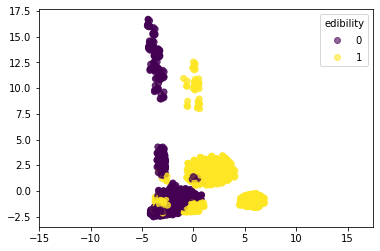

In [27]:
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape) #what are the effects of dimensionality redution for this dataset?
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.8, c = y_train)
plt.axis('equal');
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = plt.legend(handles, labels, loc="upper right", title="edibility")

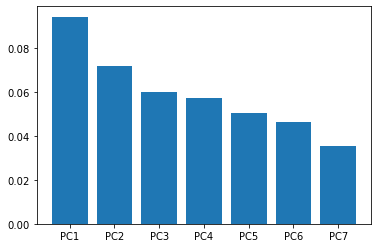

In [28]:
#what if we dont know the number of components that make up variability in our dataset?
pca_n = PCA()
pca_n = pca_n.fit(X_train_scl)
variance = pca_n.explained_variance_ratio_[0:7]
variance
df = pd.DataFrame({'var':variance,
             'PC':['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7']})
scree = plt.bar(df["PC"],df['var'])

# Perform PCA on your dataset
Take some time now to perform PCA on your wine training dataset.

How many components account for the highest variability in your data? Prepare a scree plot that shows this.

In [29]:
#

# Running different classification algorithms 
There is no single classifier that will always perform best on your dataset. Because of this we run multiple algorithms on our training dataset and evaluate their predictive scores against one another. 
In this tutorial we will use:
1. Logistic Regression
1. Support Vector Machine 
1. K- Nearest Neighbor Model
1. Decision Tree
1. Random Forest 

# Logistic Regression

This algorithm fits a “logistic function” to a dataset of true and false values. Here’s an example of a logistic function. Notice how it doesn’t go higher than 1 or lower than 0 - the fit done with logistic regression will always give a fit like this.

![](https://st4.ning.com/topology/rest/1.0/file/get/2808358994?profile=original)

* When we fit this function, it doesn’t actually give us a classification - it suggests a probability that the correct class is one class or the other. We have to choose a cut-off.

* One thing to note about Logistic regression, is that, when we do it in higher dimensional spaces, these cut-offs we choose will always be a straight line. For example, take a look at this data-set and a hypothetical decision boundary found with logistic regression:


<div>
<img src="logistic_regression_example.png" width="500"/>
</div>


In [30]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

#we should break this function down to each component

Accuracy Score: 0.9060



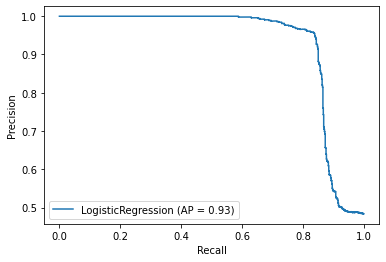

In [35]:
#precision recall curve + graphics for each classifier, frame in the context of "would you eat this mushroom given your chosen classifier"
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_pca,y_train)
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train_pca))))

# scikit learn has several functions to help with evaluating the accuracy of our model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(classifier, X_test_pca, y_test)

In [32]:
#use any of the above algorithms on the wine dataset and discuss results 

# Support Vector Machines (SVM)

* A support vector machine skips the parts with the logistic regression fit, and simply tries to stick a decision boundary into your dataset and the best possible place. It will often give very similar results to logistic regression.
* However, most SVM implementations provide you with something called the “kernel trick.” You let it add more dimensions to your dataset, and those dimensions can be used to find better decision boundaries. 

Here’s what that can look like:

![](https://miro.medium.com/max/2400/1*gXvhD4IomaC9Jb37tzDUVg.png)

In our example datset that can look like: 

<div>
<img src="svm_example.png" width="500"/>
</div>


Worth mentioning; the decision boundaries aren’t limited to circles. This trick can also be used to get other types of curved boundaries; it depends partly on what you do to add more dimensions. Many libraries will handle this for you behind the scenes. 
You can also do this trick with Logistic Regression, but it’s less commonly done.


In [ ]:
#SVM code here 

# K Nearest Neighbors

The idea behind K Nearest Neighbors is to identify K groupings of datapoints given their "distance" from one another. For each test point, look at the k nearest training points - these are its “neighbors.” We will then have those neighbors “vote” on how to classify the test point.

This method is really good at picking up bizarre decision boundaries that are difficult to capture with other methods.

This method can do poorly in areas where there are points coming from both classifications. For example, if a region of your feature space has a 60% chance of being a positive case, you probably want to mark this as positive, but 40% of your training points in that region will be negative, and it is very possible to end up near a cluster of negative neighbors and misclassify your test point.


In [ ]:
#KNN code here 

# Decision Trees

A decision tree makes a tree of “decisions” that give greater and greater quality predictions. Here’s how it looks on our example dataset.

<div>
<img src="decision_tree_example.png" width="500"/>
</div>


It deals with nonlinear situations much better than the logistic regression fit, but it’s still clearly not quite right; to the human eye we clearly should be fitting a circle, but this is a square with a rectangle sticking off of it.



# Random Forest

For a random forest, we train a bunch of decision trees on different subsets of the data. Then we average their results. This gives us a much stronger classifier than any single decision tree can produce, and mitigates many of the negative effects of decision trees.


#### What are some biological applications and examples of machine learning 

#### Useful resources for biologists getting into machine learning 

### References
* https://www.kaggle.com/raghuchaudhary/mushroom-classification
* Aurélien Géron (2019) "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition". *O'Reilly Media, Inc.*  https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
* https://towardsdatascience.com/tidying-up-with-pca-an-introduction-to-principal-components-analysis-f876599af383

